# Clasificaciones de imagenes con ResNet50V2

##BUILD ROBOCUP_2019 Dataset

###Dataset details
RoboCup Dataset contains 196195 images.

8 main parent categories that contain 180 children categories.

80% for train

20% for test


##Importar los paquetes

In [1]:
from tensorflow import keras
import zipfile
import tensorflow as tf
import os
from google.colab import drive
import matplotlib.pyplot as plt


##Resnet50V2 for subclass

###LoadData

In [ ]:
drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Mounted at /content/drive


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_CLASSES = 180

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


### Build model - Resnet50V2

In [ ]:
base_model = keras.applications.ResNet50V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

#Then, freeze the base model.
base_model.trainable = False

#Create a new model on top.
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation="relu")(x)
outputs = keras.layers.Dense(180, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 180)               92340     
                                                                 
Total params: 24,706,228
Trainable params: 1,141,428
Non-trainable params: 23,564,800
_________________________________________

###Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(), tf.keras.metrics.Precision(top_k=5, name='top_5_precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches)


Epoch 1/20
4908/4908 [==============================] - 432s 87ms/step - loss: 3.8826 - accuracy: 0.1479 - top_5_accuracy: 0.3831 - precision: 0.4951 - top_5_precision: 0.0766 - val_loss: 2.9274 - val_accuracy: 0.2563 - val_top_5_accuracy: 0.5876 - val_precision: 0.6046 - val_top_5_precision: 0.1175
Epoch 2/20
4908/4908 [==============================] - 417s 85ms/step - loss: 3.1239 - accuracy: 0.2439 - top_5_accuracy: 0.5531 - precision: 0.5783 - top_5_precision: 0.1106 - val_loss: 2.7595 - val_accuracy: 0.3044 - val_top_5_accuracy: 0.6352 - val_precision: 0.6659 - val_top_5_precision: 0.1270
Epoch 3/20
4908/4908 [==============================] - 414s 84ms/step - loss: 2.9288 - accuracy: 0.2776 - top_5_accuracy: 0.5957 - precision: 0.6070 - top_5_precision: 0.1191 - val_loss: 2.7090 - val_accuracy: 0.3195 - val_top_5_accuracy: 0.6441 - val_precision: 0.6579 - val_top_5_precision: 0.1288
Epoch 4/20
4908/4908 [==============================] - 428s 87ms/step - loss: 2.8025 - accuracy:

###print results

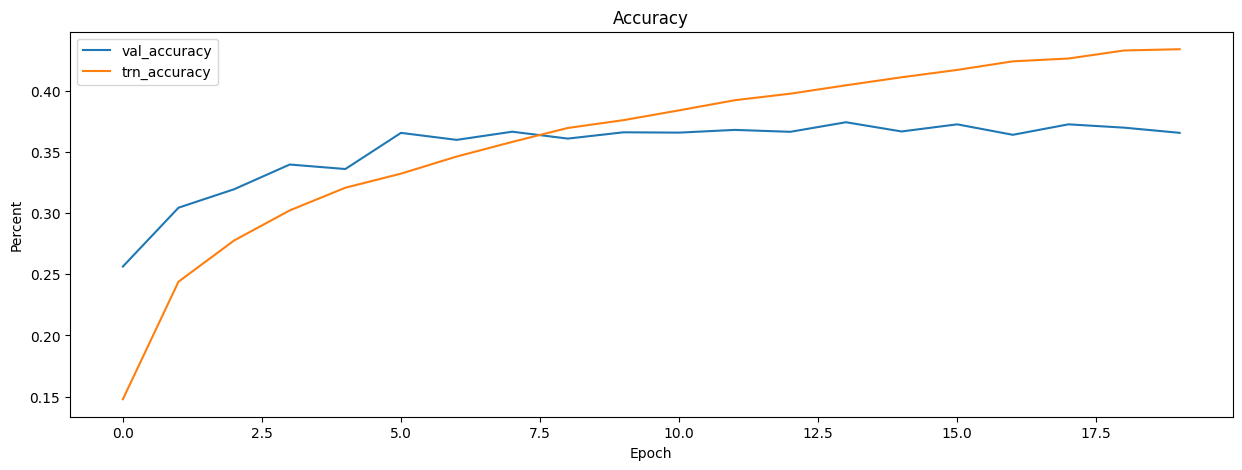

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

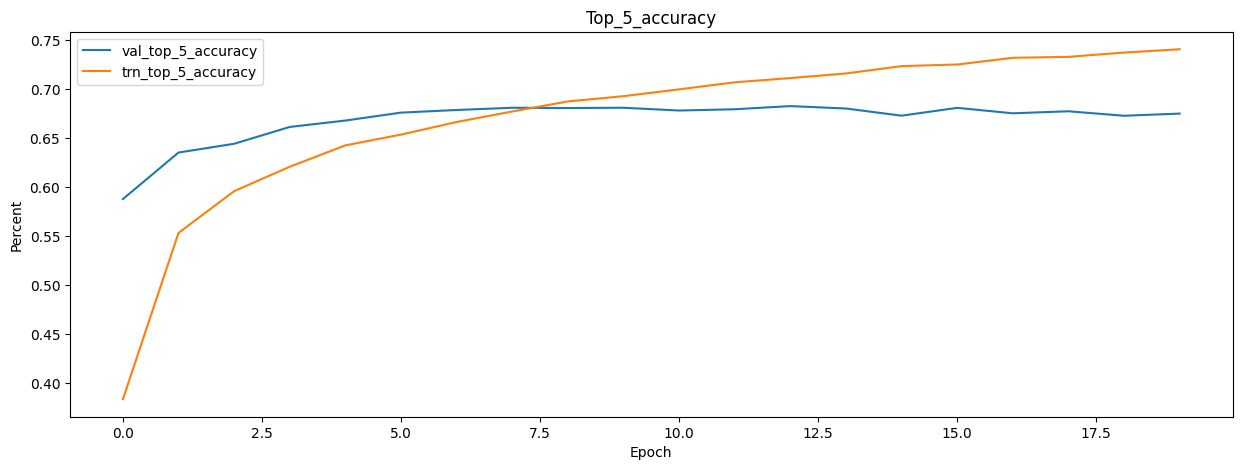

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

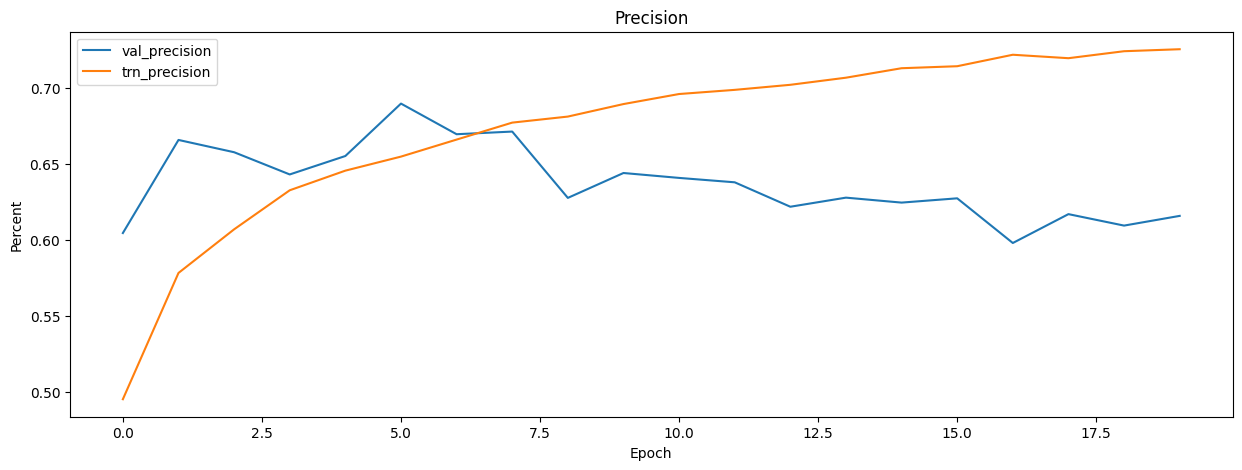

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

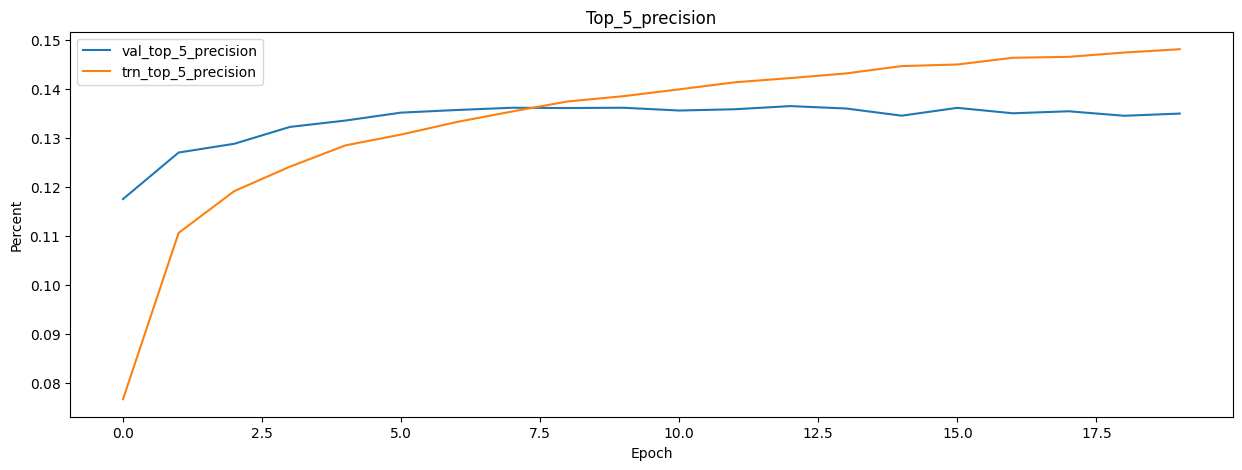

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_precision'],label='val_top_5_precision')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_precision'],label='trn_top_5_precision')
plt.title('Top_5_precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/Resnet50V2Model')

## Resnet50V2 for Superclass

###Load super class data

In [ ]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Create the model
 whose weights are generated in the previous step, when training with the fine classes.

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_CLASSES = 8

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/Resnet50V2Model')
# Agregar una nueva capa de salida personalizada
new_output_layer = keras.layers.Dense(NUM_CLASSES, activation='softmax', name='superClass')(model.layers[-1].output)

# Crear un nuevo modelo con la capa de salida personalizada
model = keras.models.Model(inputs=model.input, outputs=new_output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 180)               92340     
                                                                 
 superClass (Dense)          (None, 8)                 1448      
                                                           

### Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches)


Epoch 1/20
4859/4859 [==============================] - 419s 85ms/step - loss: 0.9166 - accuracy: 0.7337 - top_5_accuracy: 0.9588 - precision: 0.8218 - val_loss: 1.1771 - val_accuracy: 0.6381 - val_top_5_accuracy: 0.9450 - val_precision: 0.7364
Epoch 2/20
4859/4859 [==============================] - 424s 87ms/step - loss: 0.8562 - accuracy: 0.7502 - top_5_accuracy: 0.9642 - precision: 0.8414 - val_loss: 1.1705 - val_accuracy: 0.6304 - val_top_5_accuracy: 0.9456 - val_precision: 0.7295
Epoch 3/20
4859/4859 [==============================] - 408s 84ms/step - loss: 0.8123 - accuracy: 0.7591 - top_5_accuracy: 0.9673 - precision: 0.8501 - val_loss: 1.1370 - val_accuracy: 0.6464 - val_top_5_accuracy: 0.9529 - val_precision: 0.7487
Epoch 4/20
4859/4859 [==============================] - 418s 86ms/step - loss: 0.7732 - accuracy: 0.7706 - top_5_accuracy: 0.9693 - precision: 0.8593 - val_loss: 1.1181 - val_accuracy: 0.6504 - val_top_5_accuracy: 0.9490 - val_precision: 0.7496
Epoch 5/20
4859/4859

###print results

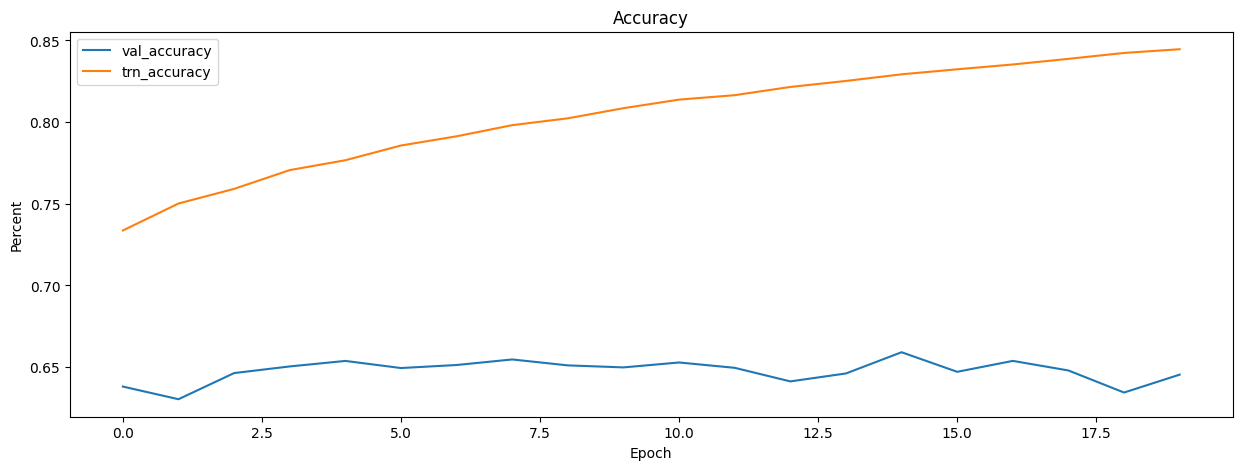

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

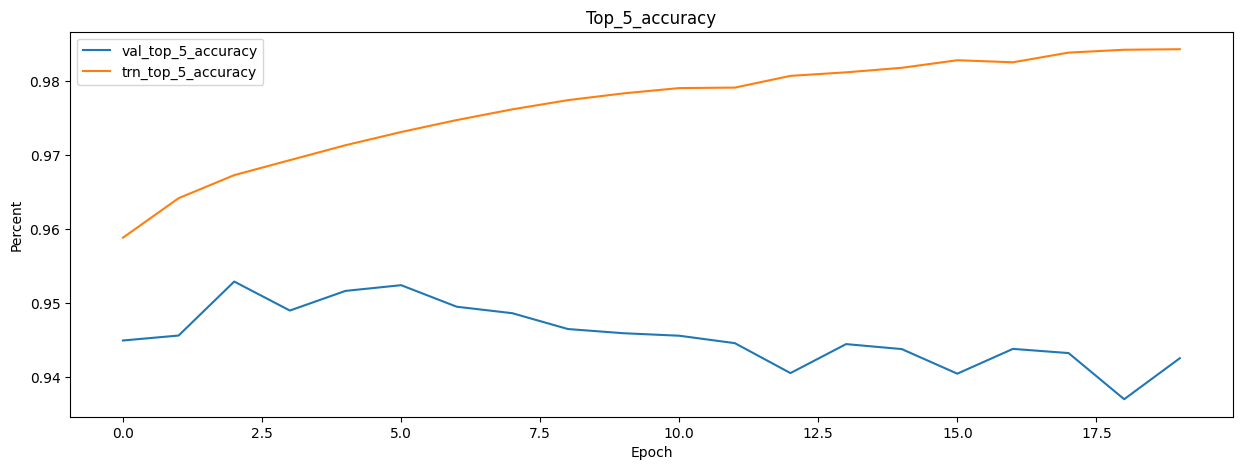

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

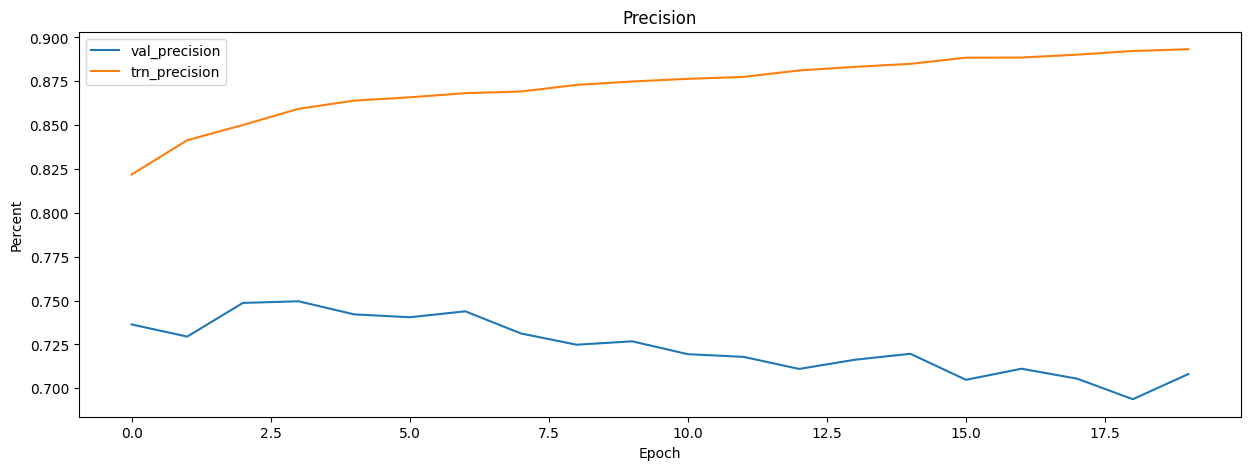

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/Resnet50V2Model_superClass')

##Fine-tuning subClass

###Load data

In [ ]:
#drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_CLASSES = 180

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


###Load model previous

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/Resnet50V2Model')
model.trainable=True
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 180)               92340     
                                                                 
Total params: 24,706,228
Trainable params: 24,660,788
Non-trainable params: 45,440
____________________________________________

###Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=25, validation_data=valid_batches)


Epoch 1/25
4908/4908 [==============================] - 736s 143ms/step - loss: 2.2140 - accuracy: 0.4278 - top_5_accuracy: 0.7304 - precision: 0.7507 - val_loss: 2.6640 - val_accuracy: 0.3887 - val_top_5_accuracy: 0.6967 - val_precision: 0.6815
Epoch 2/25
4908/4908 [==============================] - 686s 140ms/step - loss: 2.0293 - accuracy: 0.4594 - top_5_accuracy: 0.7610 - precision: 0.7759 - val_loss: 2.6385 - val_accuracy: 0.4043 - val_top_5_accuracy: 0.7123 - val_precision: 0.6720
Epoch 3/25
4908/4908 [==============================] - 682s 139ms/step - loss: 1.8775 - accuracy: 0.4879 - top_5_accuracy: 0.7837 - precision: 0.7897 - val_loss: 2.6155 - val_accuracy: 0.4191 - val_top_5_accuracy: 0.7189 - val_precision: 0.6796
Epoch 4/25
4908/4908 [==============================] - 681s 139ms/step - loss: 1.7383 - accuracy: 0.5171 - top_5_accuracy: 0.8052 - precision: 0.8080 - val_loss: 2.6187 - val_accuracy: 0.4263 - val_top_5_accuracy: 0.7257 - val_precision: 0.6789
Epoch 5/25
4908/

###print results

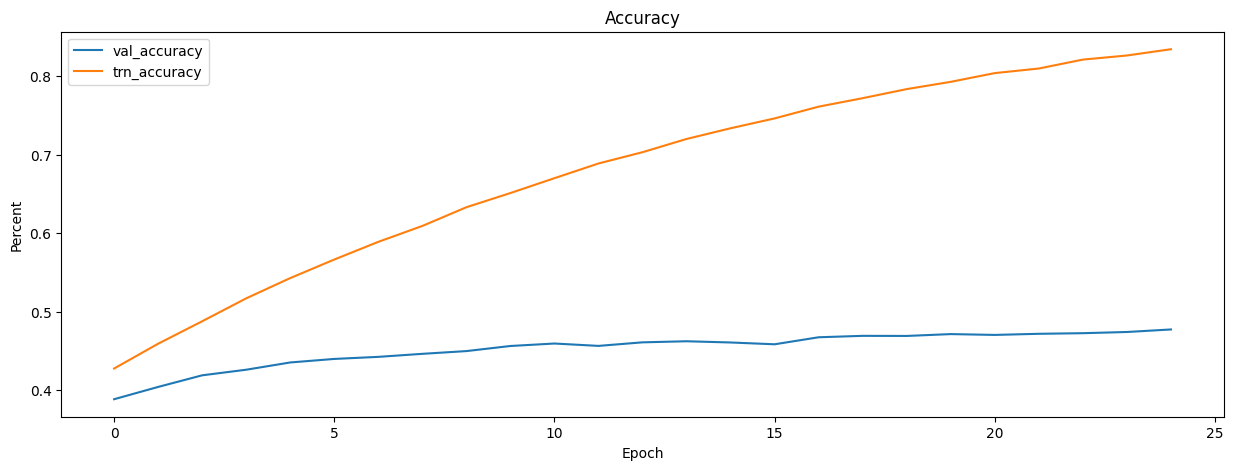

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

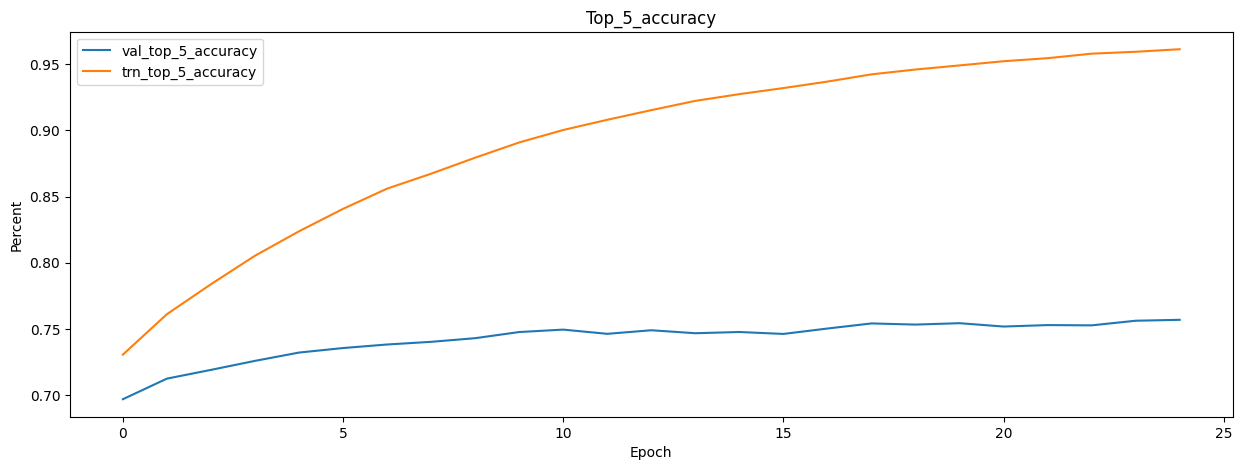

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

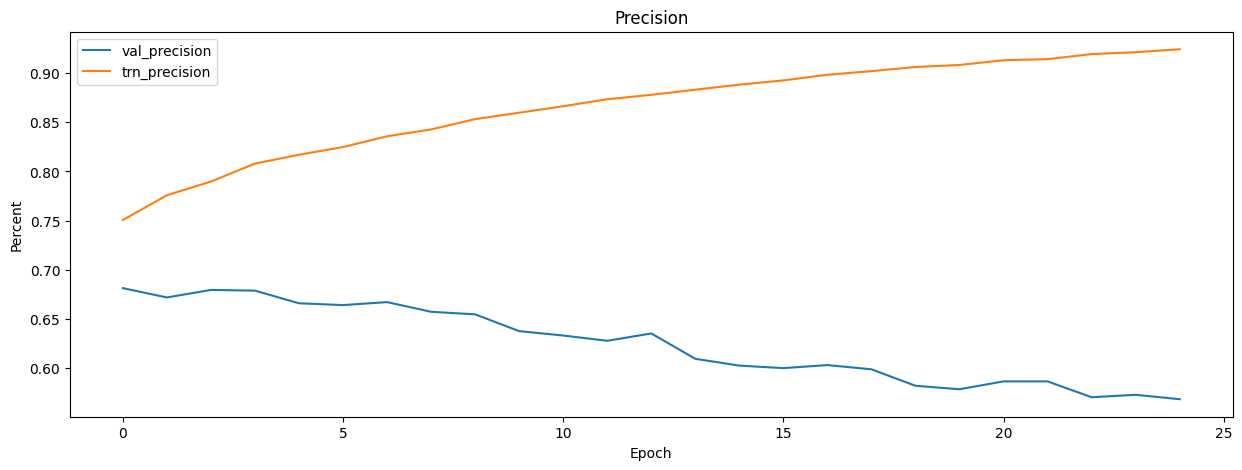

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/Resnet50V2Model_fineTuning')

##Fine-tuning superClass

###Load data

In [3]:
drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Mounted at /content/drive


In [4]:
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_CLASSES = 8

In [5]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


###Load model previous

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/Resnet50V2Model_superClass')
model.trainable=True
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 180)               92340     
                                                                 
 superClass (Dense)          (None, 8)                 1448      
                                                           

###Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=15, validation_data=valid_batches)


Epoch 1/15
4859/4859 [==============================] - 721s 142ms/step - loss: 0.6751 - accuracy: 0.7906 - top_5_accuracy: 0.9759 - precision: 0.8529 - val_loss: 1.2140 - val_accuracy: 0.6292 - val_top_5_accuracy: 0.9408 - val_precision: 0.7040
Epoch 2/15
4859/4859 [==============================] - 683s 141ms/step - loss: 0.6244 - accuracy: 0.8043 - top_5_accuracy: 0.9787 - precision: 0.8678 - val_loss: 1.1783 - val_accuracy: 0.6419 - val_top_5_accuracy: 0.9425 - val_precision: 0.7143
Epoch 3/15
4859/4859 [==============================] - 700s 144ms/step - loss: 0.5795 - accuracy: 0.8198 - top_5_accuracy: 0.9807 - precision: 0.8808 - val_loss: 1.1705 - val_accuracy: 0.6475 - val_top_5_accuracy: 0.9462 - val_precision: 0.7166
Epoch 4/15
4859/4859 [==============================] - 708s 146ms/step - loss: 0.5322 - accuracy: 0.8356 - top_5_accuracy: 0.9825 - precision: 0.8915 - val_loss: 1.1875 - val_accuracy: 0.6439 - val_top_5_accuracy: 0.9423 - val_precision: 0.7125
Epoch 5/15
4859/

###print results

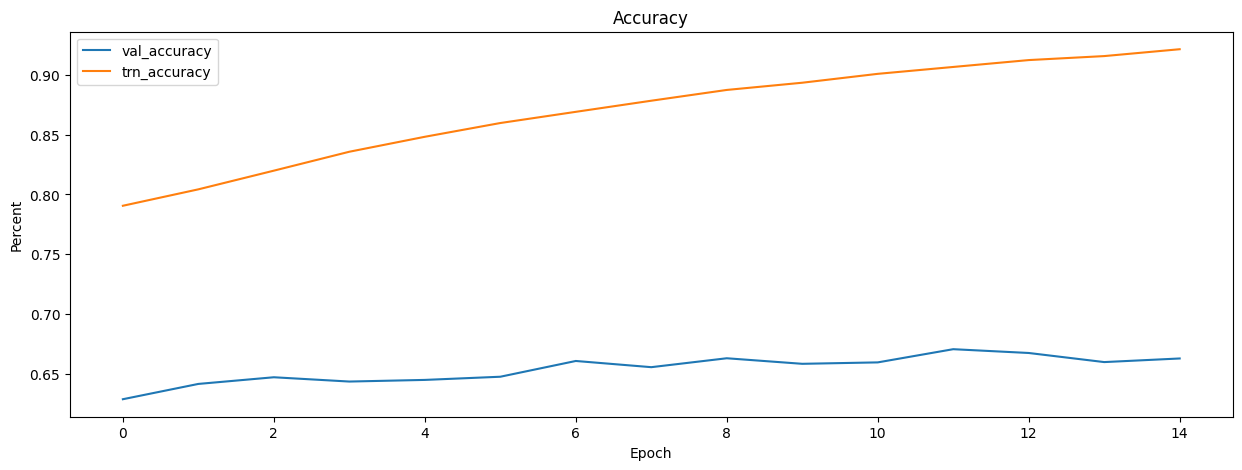

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

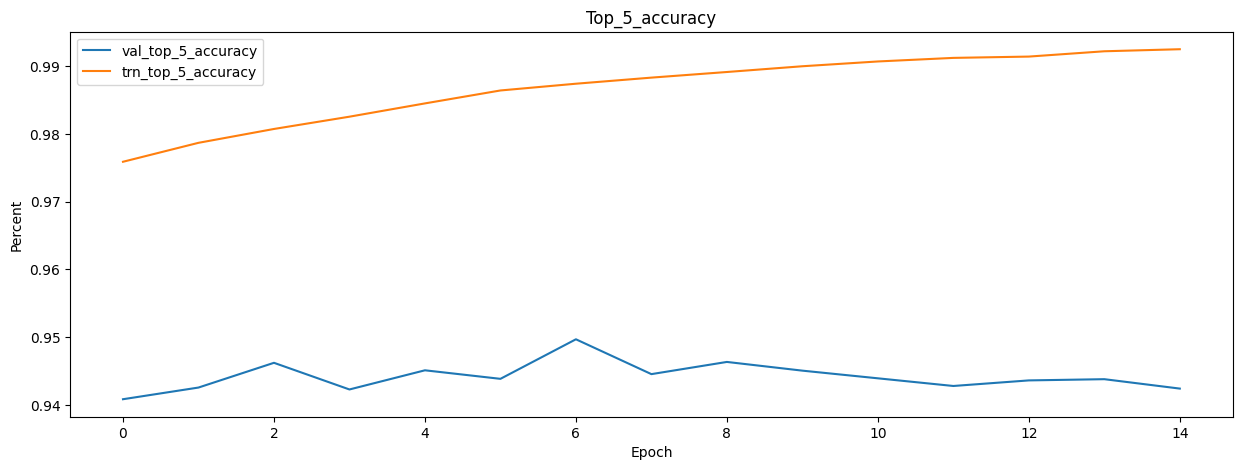

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

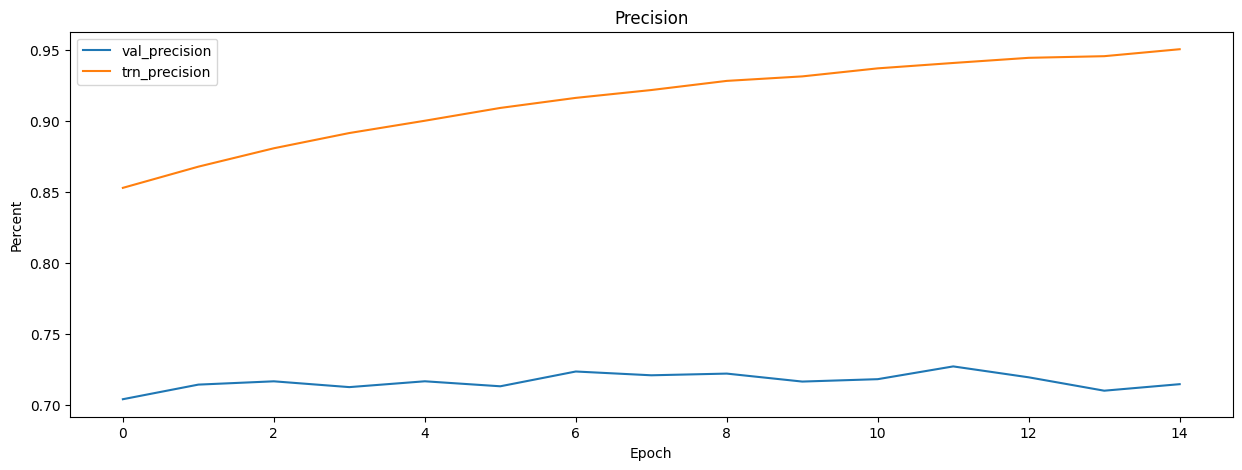

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/Resnet50V2_SuperClass_fineTuning')

In [ ]:
from google.colab import runtime
runtime.unassign

<function google.colab.runtime.unassign()>

##Confusion Matrix

###Importar los paquetes

In [24]:
from tensorflow import keras
from google.colab import drive
from sklearn.metrics import confusion_matrix
import zipfile
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###Montar drive y definir el tamaño


In [ ]:
drive.mount('/content/drive')
BATCH_SIZE = 32
IMG_SIZE = 224

###Clases padres

In [25]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


<ipython-input-28-f63b2275164d>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(valid_batches)


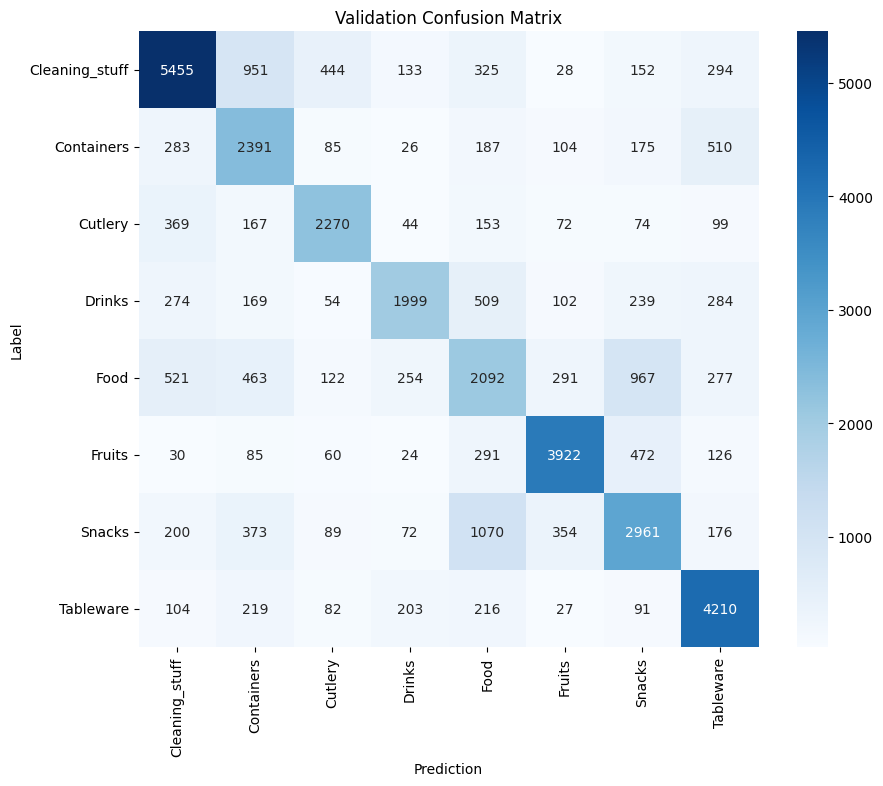

In [28]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/Resnet50V2_SuperClass_fineTuning')

class_names = ['Cleaning_stuff', 'Containers', 'Cutlery', 'Drinks', 'Food', 'Fruits', 'Snacks', 'Tableware']

# Obtener las predicciones del modelo en el conjunto de validación
predictions = model.predict_generator(valid_batches)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de validación
true_classes = valid_batches.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="g", cmap='Blues'
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Validation Confusion Matrix")
plt.show()

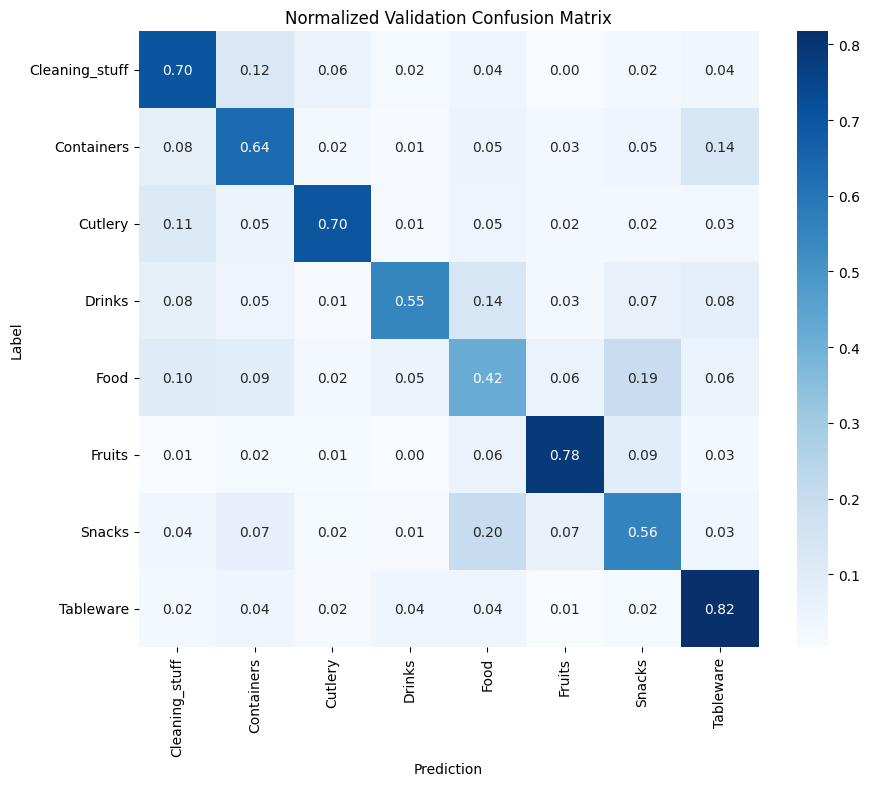

In [29]:
# Calcular el porcentaje de acierto para cada clase
class_totals = np.sum(confusion_mtx, axis=1)  # Total de instancias por clase
confusion_mtx_norm = confusion_mtx.astype('float') / class_totals[:, np.newaxis]  # Dividir cada elemento por el total de instancias en la clase correspondiente

# Plotear la matriz de confusión normalizada
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx_norm, xticklabels=class_names, yticklabels=class_names, annot=True, fmt=".2f", cmap='Blues'
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Normalized Validation Confusion Matrix")
plt.show()

###Clases hijos

In [30]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [31]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/Resnet50V2Model_fineTuning')

# Obtener las predicciones del modelo en el conjunto de validación
predictions = model.predict_generator(valid_batches)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de validación
true_classes = valid_batches.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

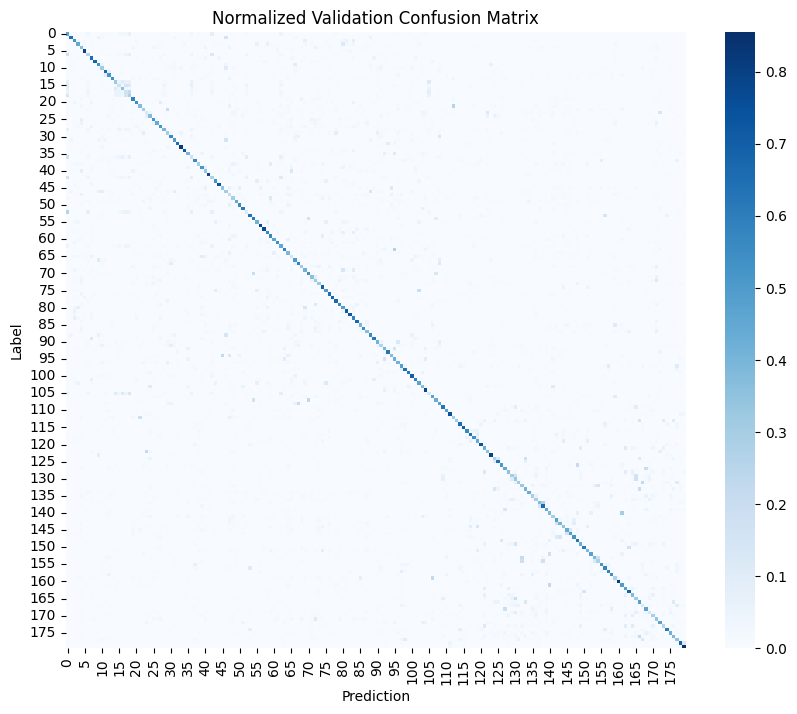

In [36]:
# Calcular el porcentaje de acierto para cada clase
class_totals = np.sum(confusion_mtx, axis=1)  # Total de instancias por clase
confusion_mtx_norm = confusion_mtx.astype('float') / class_totals[:, np.newaxis]  # Dividir cada elemento por el total de instancias en la clase correspondiente

# Plotear la matriz de confusión normalizada
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx_norm, cmap='Blues'
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Normalized Validation Confusion Matrix")
plt.show()